In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
cols = ["arch", "activation", "attack", "iterations", "eps 2", "eps 4", "eps 6", "eps 8", "eps 10", "SROCC"]
data = pd.read_csv("rs/results.csv", header=0, usecols=cols)

In [4]:
data.sample(5, random_state=0)

,arch,activation,attack,iterations,eps 2,eps 4,eps 6,eps 8,eps 10,SROCC
1,resnet18,silu,IFGSM,1,0.039062,0.058201,0.068903,0.075893,0.081801,0.892089
6,wideresnet50,relu,IFGSM,1,0.022592,0.031409,0.035890,0.037915,0.038926,0.914137
8,resnet50,Fsilu,IFGSM,1,0.040113,0.066709,0.091725,0.117780,0.145800,0.805964
10,resnet18,Fsilu,IFGSM,1,0.028127,0.051919,0.073056,0.093081,0.112755,0.857626
14,resnet34+prune=0.2,relu,PGD,5,0.101988,0.154486,0.167064,0.150960,0.140199,0.902069


In [5]:
data[(data["arch"]=="resnet50")&(data["activation"]=="Fsilu")].loc[:,"eps 2": "eps 10"].values

array([[0.04011309, 0.06670947, 0.09172539, 0.11778046, 0.14579967]])

In [6]:
group1 = [("resnet18", "relu"), ("resnet34", "relu"), ("resnet50", "relu"), ("wideresnet50", "relu")]
group2 = [("resnet50", "relu"), ("resnet50", "silu"), ("resnet50", "Fsilu")]
group3 = [("wideresnet50", "relu"),("vonenet50", "relu")]

/tmp/ipykernel_2948/1032577096.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig, axs = plt.subplots(2,2, figsize=(16,8), subplot_kw={"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
/tmp/ipykernel_2948/1032577096.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig, axs = plt.subplots(2,2, figsize=(16,8), subplot_kw={"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
/tmp/ipykernel_2948/1032577096.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig, axs = plt.subplots(2,2, figsize=(16,8), subplot_kw={"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
/tmp/ipykernel_2948/1032577096.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after

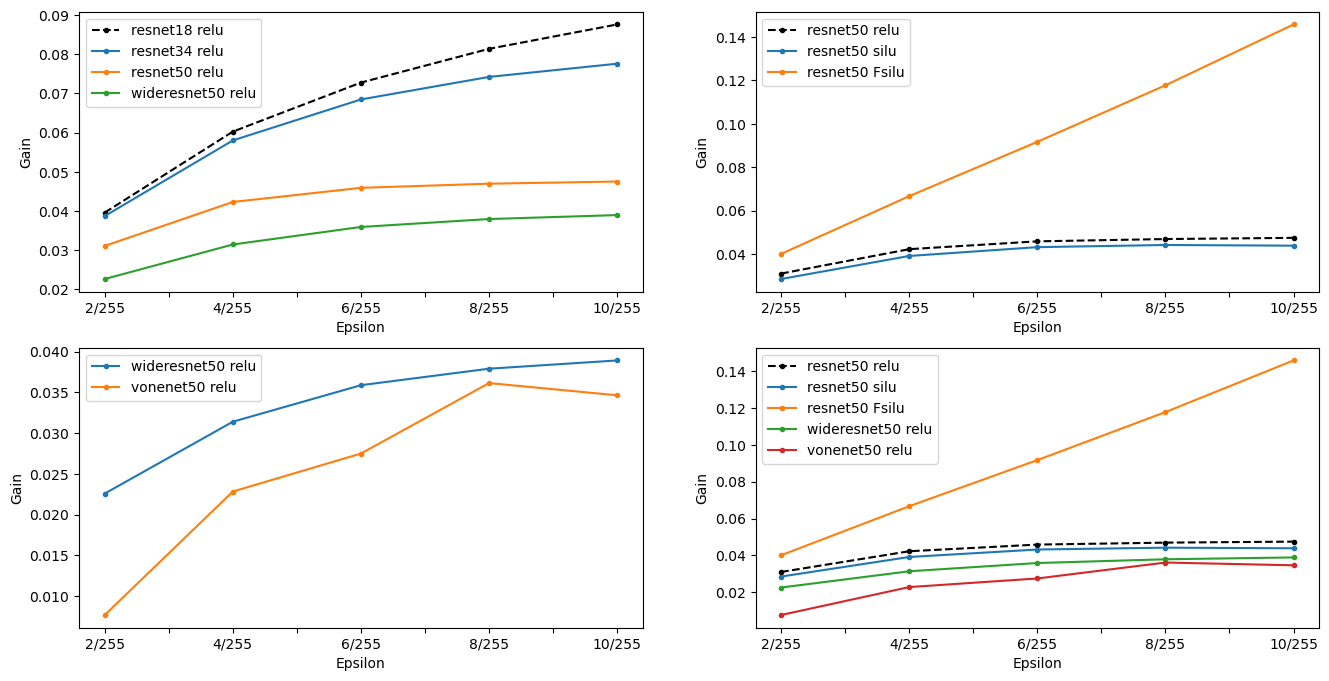

In [10]:
group = group2 + group3
groups = [group1, group2, group3, group]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']

fig, axs = plt.subplots(2,2, figsize=(16,8), subplot_kw={"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
baseline = [('resnet18','relu'),('resnet50','relu')]

for i in range(4):
    axis = axs[i//2, i%2]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        if (i==0 and (arch, activ) == baseline[0])or(i>0 and (arch, activ) == baseline[1]):
            axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{arch} {activ}")
        else:
            axis.plot(epsilons, y_axis, marker=".",label=f"{arch} {activ}")
    axis.legend(loc="upper left")

plt.show()


In [30]:
x = [2, 4, 6, 8, 10]
grp = set(group1+group2+group3)
df = pd.DataFrame(columns=['architecture', 'activation', 'result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    
    df.loc[len(df)] = {'architecture': arch, 'activation': activ, 'result': np.trapz(y_axis, x)}
df.sort_values('result')

,architecture,activation,result
5,vonenet50,relu,0.215320
2,wideresnet50,relu,0.271946
0,resnet50,silu,0.325588
1,resnet50,relu,0.348781
6,resnet34,relu,0.517759
3,resnet18,relu,0.556171
4,resnet50,Fsilu,0.738343
